In [10]:
import os

data_payload = os.listdir("./data/")

In [12]:
data_payload = sorted(data_payload)

In [13]:
for i, payload in enumerate(data_payload):
    print(payload)

01Mb.dat
02Mb.dat
03Mb.dat
04Mb.dat
05Mb.dat
06Mb.dat
07Mb.dat
08Mb.dat
09Mb.dat
10Mb.dat
11Mb.dat
12Mb.dat
13Mb.dat
14Mb.dat
15Mb.dat


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
#import seaborn as sns
#sns.set()
def panda_from_gspreadsheet(key, sheet_name='Sheet1', header=0):
    # google spredsheet TO panda dataframe 
    # ricordarsi di abilitare lo sharing pubblico dei dati

    url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
      key=key, sheet_name=sheet_name.replace(' ', '%20'))
    return pd.read_csv(url, header=header)

#https://docs.google.com/spreadsheets/d/1Rw1FrLR51NheXgUna_F0Ty_BXRGwAfwkBADpNZyK44k/edit?usp=sharing
pd =  panda_from_gspreadsheet('1Rw1FrLR51NheXgUna_F0Ty_BXRGwAfwkBADpNZyK44k', sheet_name='Sheet1')

In [48]:
pd

,Unnamed: 0,Unnamed: 1,M1,M1_all,Unnamed: 4,Unnamed: 5,LNF,LNF_all,Unnamed: 8,Unnamed: 9,LNGS,LNGS_all,Unnamed: 12,Unnamed: 13,LNGS_r,LNGS_all_r
0,0,204,0.80,0.80,0,204,0.87,0.88,0.0,204.0,1.47,1.47,0,204,1.30,1.31
1,1,204,0.98,0.99,1,204,0.98,0.99,1.0,204.0,1.21,1.22,1,204,1.12,1.13
2,2,204,5.09,5.10,2,204,0.93,0.94,2.0,204.0,1.19,1.20,2,204,1.05,1.05
3,3,204,0.79,0.80,3,204,1.01,1.01,3.0,204.0,2.46,2.46,3,204,0.97,0.97
4,4,204,0.76,0.77,4,204,0.95,0.95,4.0,204.0,1.21,1.21,4,204,0.96,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,204,0.80,0.81,996,204,0.94,0.95,NaN,NaN,NaN,NaN,996,204,1.19,1.19
997,997,204,0.77,0.78,997,204,0.90,0.90,NaN,NaN,NaN,NaN,997,204,1.04,1.05
998,998,204,1.01,1.02,998,204,1.13,1.14,NaN,NaN,NaN,NaN,998,204,1.12,1.13
999,999,204,0.77,0.78,999,204,0.91,0.92,NaN,NaN,NaN,NaN,999,204,1.08,1.09


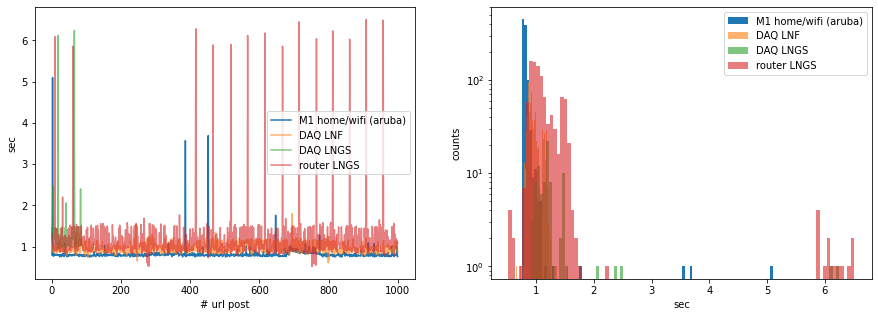

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(pd.M1_all, label="M1 home/wifi (aruba)")
ax[0].plot(pd.LNF_all, label="DAQ LNF", alpha=0.6)
ax[0].plot(pd.LNGS_all, label="DAQ LNGS", alpha=0.6)
ax[0].plot(pd.LNGS_all_r, label="router LNGS", alpha=0.6)
ax[0].set_ylabel("sec")
ax[0].set_xlabel("# url post")
#ax[0].set_yscale('log')
ax[0].legend()
ax[1].hist(pd.M1_all, bins=100, label="M1 home/wifi (aruba)")
ax[1].hist(pd.LNF_all, bins=100, alpha=0.6, label="DAQ LNF")
ax[1].hist(pd.LNGS_all, bins=100, alpha=0.6, label="DAQ LNGS")
ax[1].hist(pd.LNGS_all_r, bins=100, label="router LNGS", alpha=0.6)
ax[1].set_xlabel("sec")
ax[1].set_ylabel("counts")
ax[1].set_yscale('log')
ax[1].legend()
plt.show()

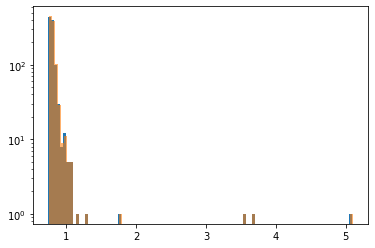

In [23]:
plt.hist(pd.M1, bins=100)
plt.hist(pd.M1_all, bins=100, alpha=0.6)
plt.yscale('log')
plt.show()

In [1]:
import multiprocessing

In [5]:
def ftodo():
    import time
    time.sleep(4)
    print("END")
    return
queue = multiprocessing.Queue(maxsize=100)

queue.put(ftodo(), block=True, timeout=None)

END


In [7]:
# SuperFastPython.com
# example of using the queue between processes without blocking
from time import sleep
from random import random
from multiprocessing import Process
from multiprocessing import Queue
from queue import Empty
 
# generate work
def producer(queue):
    print('Producer: Running', flush=True)
    # generate work
    for i in range(10):
        # generate a value
        value = random()
        # block
        sleep(value)
        # add to the queue
        queue.put(value)
    # all done
    queue.put(None)
    print('Producer: Done', flush=True)
 
# consume work
def consumer(queue):
    print('Consumer: Running', flush=True)
    # consume work
    while True:
        # get a unit of work
        try:
            item = queue.get(block=False)
        except Empty:
            print('Consumer: got nothing, waiting a while...', flush=True)
            sleep(0.5)
            continue
        # check for stop
        if item is None:
            break
        # report
        print(f'>got {item}', flush=True)
    # all done
    print('Consumer: Done', flush=True)
 
# entry point
if __name__ == '__main__':
    # create the shared queue
    queue = Queue()
    # start the consumer process
    consumer_process = Process(target=consumer, args=(queue,))
    consumer_process.start()
    # start the producer process
    producer_process = Process(target=producer, args=(queue,))
    producer_process.start()
    # wait for all processes to finish
    producer_process.join()
    consumer_process.join()

Consumer: RunningProducer: Running

Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
>got 0.6082237548476385
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
>got 0.5944210517004711
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a while...
Consumer: got nothing, waiting a w